In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['wisconsin_breast_cancer.csv']


Author:Michael Zhou

ID:1337316

Pair Programming Buddy:

Name:Lan Niu

ID:1320386


In [2]:
breastData = pd.read_csv('../input/wisconsin_breast_cancer.csv')
breastData.head()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [3]:
median_nuclei = breastData['nuclei'].median()
breastData['nuclei'].fillna(median_nuclei, inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
x = breastData.iloc[:,1:10]
y = breastData.iloc[:,10]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1337316)
print(len(X_train), len(X_test))



559 140


In [5]:
allresult=[]
allname=[]
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd=SGDClassifier(random_state=1337316,max_iter=1000,tol=1e-3)

for i in range(1,512):
    tmp=int("{0:b}".format(i))
    result=[]
   
    for x in range(9):
        if tmp%10==1:
            if(x==0):
               
                result.append('thickness')
            elif (x==1):
            
                result.append('size')
            elif (x==2):
             
                result.append('shape')
            elif (x==3):
                
                result.append('adhesion')
            elif (x==4):
               
                result.append('single')
            elif (x==5):
                
                result.append('nuclei')
            elif (x==6):
               
                result.append('chromatin')
            elif (x==7):
              
                result.append('nucleoli')
            elif(x==8):
               
                result.append('mitosis')
        tmp=tmp//10
    
    if len(result)==1:
        continue
    elif len(result)==2:
        X_trainNew1=X_train.loc[:,[result[0],result[1]]]   
    elif len(result)==3:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2]]]
    elif len(result)==4:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3]]]
    elif len(result)==5:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
    elif len(result)==6:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
    elif len(result)==7:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
    elif len(result)==8:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
    elif len(result)==9:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
           
    display_score=cross_val_score(sgd,X_trainNew1,y_train,cv=10,scoring="accuracy")
    display_score.mean()
    
    print(*result)
    print(display_score.mean())
    allname.append(result)
    allresult.append(display_score.mean())
    
    
    

    
    

thickness size
0.935574162679426
thickness shape
0.9393671679197994
size shape
0.9174897470950102
thickness size shape
0.9516478696741855
thickness adhesion
0.928524151287309
size adhesion
0.9338533834586465
thickness size adhesion
0.9498934837092733
shape adhesion
0.9285879471405787
thickness shape adhesion
0.9587930052403738
size shape adhesion
0.9445989974937344
thickness size shape adhesion
0.9497983595352016
thickness single
0.9177101845522898
size single
0.9211887673729778
thickness size single
0.9517441330599226
shape single
0.9248866484392799
thickness shape single
0.9516791979949873
size shape single
0.9517743221690591
thickness size shape single
0.9551566416040101
adhesion single
0.8927392344497607
thickness adhesion single
0.9231009341535656
size adhesion single
0.9282701070858966
thickness size adhesion single
0.9443762816131237
shape adhesion single
0.9444064707222601
thickness shape adhesion single
0.9533709273182958
size shape adhesion single
0.9480764411027568
thickness

Find the best subset given cross-validation scores 

In [6]:
print("Best subset for train data")
print(*allname[allresult.index(max(allresult))])
print(max(allresult))


Best subset for train data
thickness shape single nuclei chromatin
0.9713904078377764


In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
allresult1=[]
allname1=[]
for i in range(1,512):
    tmp=int("{0:b}".format(i))
    result=[]
   
    for x in range(9):
        if tmp%10==1:
            if(x==0):
               
                result.append('thickness')
            elif (x==1):
            
                result.append('size')
            elif (x==2):
             
                result.append('shape')
            elif (x==3):
                
                result.append('adhesion')
            elif (x==4):
               
                result.append('single')
            elif (x==5):
                
                result.append('nuclei')
            elif (x==6):
               
                result.append('chromatin')
            elif (x==7):
              
                result.append('nucleoli')
            elif(x==8):
               
                result.append('mitosis')
        tmp=tmp//10
    
    if len(result)==1:
        continue 
        #X_trainNew1=X_train.loc[:,result[0]]
    elif len(result)==2:
        X_testNew=X_test.loc[:,[result[0],result[1]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1]]]
    elif len(result)==3:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2]]]
    elif len(result)==4:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3]]]
    elif len(result)==5:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
    elif len(result)==6:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
    elif len(result)==7:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
    elif len(result)==8:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
    elif len(result)==9:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
    
    sgd.fit(X_trainNew1, y_train)
    d=accuracy_score(sgd.predict(X_testNew),y_test)
    print(d)
    print(*result)
    allname1.append(result)
    allresult1.append(d)
    
    

0.9285714285714286
thickness size
0.9428571428571428
thickness shape
0.9428571428571428
size shape
0.9571428571428572
thickness size shape
0.9214285714285714
thickness adhesion
0.9142857142857143
size adhesion
0.9214285714285714
thickness size adhesion
0.8714285714285714
shape adhesion
0.9357142857142857
thickness shape adhesion
0.9285714285714286
size shape adhesion
0.9357142857142857
thickness size shape adhesion
0.9428571428571428
thickness single
0.8928571428571429
size single
0.9285714285714286
thickness size single
0.9357142857142857
shape single
0.8857142857142857
thickness shape single
0.9285714285714286
size shape single
0.9642857142857143
thickness size shape single
0.8714285714285714
adhesion single
0.9571428571428572
thickness adhesion single
0.9285714285714286
size adhesion single
0.95
thickness size adhesion single
0.9428571428571428
shape adhesion single
0.95
thickness shape adhesion single
0.95
size shape adhesion single
0.95
thickness size shape adhesion single
0.95
th

Find the accuracy of same five subset, then find the best accuracy. They are different, so the test result is not the best data accuracy.

In [8]:
print("Accaurcy for the best subset in train data for sgd classifier")
print(allresult1[allname1.index(allname[allresult.index(max(allresult))])])

print("The best subset for test data for sgd classifier")
print(*allname1[allresult1.index(max(allresult1))])
print(max(allresult1))

Accaurcy for the best subset in train data for sgd classifier
0.9571428571428572
The best subset for test data for sgd classifier
thickness size shape nuclei mitosis
0.9785714285714285


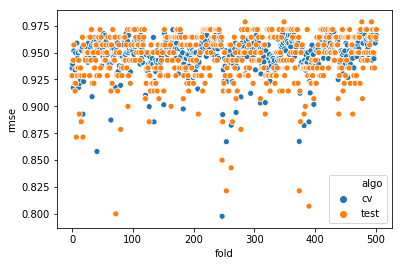

In [9]:
import seaborn as sns
cv_tupels = [[f,'cv',x] for f,x in zip(range(511),allresult)]
test_tupels = [[f,'test',x] for f,x in zip(range(511),allresult1)]
results = pd.DataFrame(cv_tupels+test_tupels,columns=['fold','algo','rmse'])
sns.scatterplot(data=results,x='fold',y='rmse',hue='algo')



Answer:
1.Which subset looks best given the cross-validation scores?

    A:  The subset of 'thickness shape single nuclei chromatin' is the best in train data with a score of 0.9733048530416951

2. What is the accuracy of this subset on the test data?
    A:  The accuracy of this subset on test data is 0.9571428571428572
    
3. Is that the best possible test data accuracy?
    A:  No, the best data accuracy for test data is not the best one in train data, is another setsub of 'thickness size adhesion nuclei nucleoli' which has the accuracy of 0.9785714285714285

Part2

--------------- random forest classifier's subset for train data ---------------

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest_data=RandomForestClassifier(random_state=1337316,n_estimators=30)
allresult2=[]
allname2=[]
for i in range(1,512):
    tmp=int("{0:b}".format(i))
    result=[]
   
    for x in range(9):
        if tmp%10==1:
            if(x==0):
               
                result.append('thickness')
            elif (x==1):
            
                result.append('size')
            elif (x==2):
             
                result.append('shape')
            elif (x==3):
                
                result.append('adhesion')
            elif (x==4):
               
                result.append('single')
            elif (x==5):
                
                result.append('nuclei')
            elif (x==6):
               
                result.append('chromatin')
            elif (x==7):
              
                result.append('nucleoli')
            elif(x==8):
               
                result.append('mitosis')
        tmp=tmp//10
    
    if len(result)==1:
        continue
    elif len(result)==2:
        X_trainNew1=X_train.loc[:,[result[0],result[1]]]   
    elif len(result)==3:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2]]]
    elif len(result)==4:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3]]]
    elif len(result)==5:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
    elif len(result)==6:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
    elif len(result)==7:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
    elif len(result)==8:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
    elif len(result)==9:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
        
    display_score=cross_val_score(forest_data,X_trainNew1,y_train,cv=10,scoring="accuracy")
    display_score.mean()
    
    print(*result)
    print(display_score.mean())
    allname2.append(result)
    allresult2.append(display_score.mean())

thickness size
0.9266108452950558
thickness shape
0.9337873091820461
size shape
0.9336585782638412
thickness size shape
0.9445038733196627
thickness adhesion
0.9250814536340852
size adhesion
0.9265806561859193
thickness size adhesion
0.9392093871041238
shape adhesion
0.9213801549327865
thickness shape adhesion
0.9570699475962634
size shape adhesion
0.9265772385509228
thickness size shape adhesion
0.9462257917521075
thickness single
0.9286517429938483
size single
0.9445027341079972
thickness size single
0.939144452039189
shape single
0.9318067897015265
thickness shape single
0.9552204374572796
size shape single
0.9426207564365459
thickness size shape single
0.955284233310549
adhesion single
0.9122601959444063
thickness adhesion single
0.9374225336067441
size adhesion single
0.9336272499430394
thickness size adhesion single
0.9498934837092732
shape adhesion single
0.9390795169742538
thickness shape adhesion single
0.9659370015948964
size shape adhesion single
0.9425580997949419
thickness

In [11]:
print("Best accuracy for random forest's train subset")
print(*allname2[allresult2.index(max(allresult2))])
print(max(allresult2))

Best accuracy for random forest's train subset
thickness shape adhesion single nucleoli
0.9767173615857825


-------------------------- random forest's test subset -------------------------

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
allresult3=[]
allname3=[]

for i in range(1,512):
    tmp=int("{0:b}".format(i))
    result=[]
   
    for x in range(9):
        if tmp%10==1:
            if(x==0):
               
                result.append('thickness')
            elif (x==1):
            
                result.append('size')
            elif (x==2):
             
                result.append('shape')
            elif (x==3):
                
                result.append('adhesion')
            elif (x==4):
               
                result.append('single')
            elif (x==5):
                
                result.append('nuclei')
            elif (x==6):
               
                result.append('chromatin')
            elif (x==7):
              
                result.append('nucleoli')
            elif(x==8):
               
                result.append('mitosis')
        tmp=tmp//10
    
    if len(result)==1:
        continue 
    elif len(result)==2:
        X_testNew=X_test.loc[:,[result[0],result[1]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1]]]
    elif len(result)==3:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2]]]
    elif len(result)==4:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3]]]
    elif len(result)==5:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
    elif len(result)==6:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
    elif len(result)==7:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
    elif len(result)==8:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
    elif len(result)==9:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
    
    forest_data.fit(X_trainNew1, y_train)
    d=accuracy_score(forest_data.predict(X_testNew),y_test)
    print(d)
    print(*result)
    allname3.append(result)
    allresult3.append(d)

0.9357142857142857
thickness size
0.9428571428571428
thickness shape
0.9357142857142857
size shape
0.95
thickness size shape
0.9071428571428571
thickness adhesion
0.9142857142857143
size adhesion
0.9285714285714286
thickness size adhesion
0.9142857142857143
shape adhesion
0.9285714285714286
thickness shape adhesion
0.9571428571428572
size shape adhesion
0.9571428571428572
thickness size shape adhesion
0.8928571428571429
thickness single
0.9142857142857143
size single
0.9
thickness size single
0.95
shape single
0.9357142857142857
thickness shape single
0.9428571428571428
size shape single
0.9428571428571428
thickness size shape single
0.9
adhesion single
0.9214285714285714
thickness adhesion single
0.9142857142857143
size adhesion single
0.9214285714285714
thickness size adhesion single
0.9571428571428572
shape adhesion single
0.9357142857142857
thickness shape adhesion single
0.9428571428571428
size shape adhesion single
0.95
thickness size shape adhesion single
0.95
thickness nuclei
0

In [13]:
print("The best subset for random forest's train data in test data")
print(allresult3[allname3.index(allname2[allresult2.index(max(allresult2))])])
print("---------")
print("The best subset for random forest's test data")
print(*allname3[allresult3.index(max(allresult3))])
print(max(allresult3))

The best subset for random forest's train data in test data
0.95
---------
The best subset for random forest's test data
thickness shape single nuclei nucleoli
0.9714285714285714


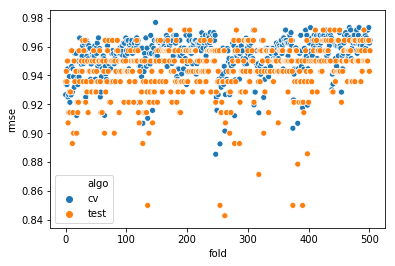

In [14]:
import seaborn as sns
cv_tupels = [[f,'cv',x] for f,x in zip(range(511),allresult2)]
test_tupels = [[f,'test',x] for f,x in zip(range(511),allresult3)]
results = pd.DataFrame(cv_tupels+test_tupels,columns=['fold','algo','rmse'])
sns.scatterplot(data=results,x='fold',y='rmse',hue='algo')

Answer:
1.Which subset looks best given the cross-validation scores?

    A:  The subset of 'thickness shape adhesion single nucleoli' is the best in train data with a score of 0.9767173615857825

2. What is the accuracy of this subset on the test data?
    A:  The accuracy of this subset on test data is 0.95
    
3. Is that the best possible test data accuracy?
    A:  No, the best data accuracy for test data is not the best one in train data, is another setsub of 'thickness size single nuclei chromatin mitosis' which has the accuracy of 0.9714

---------------------- GaussianNB's train data ---------------------------------

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
GNB_data=GaussianNB()
allresult4=[]
allname4=[]
for i in range(1,512):
    tmp=int("{0:b}".format(i))
    result=[]
   
    for x in range(9):
        if tmp%10==1:
            if(x==0):
               
                result.append('thickness')
            elif (x==1):
            
                result.append('size')
            elif (x==2):
             
                result.append('shape')
            elif (x==3):
                
                result.append('adhesion')
            elif (x==4):
               
                result.append('single')
            elif (x==5):
                
                result.append('nuclei')
            elif (x==6):
               
                result.append('chromatin')
            elif (x==7):
              
                result.append('nucleoli')
            elif(x==8):
               
                result.append('mitosis')
        tmp=tmp//10
    
    if len(result)==1:
        continue
    elif len(result)==2:
        X_trainNew1=X_train.loc[:,[result[0],result[1]]]   
    elif len(result)==3:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2]]]
    elif len(result)==4:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3]]]
    elif len(result)==5:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
    elif len(result)==6:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
    elif len(result)==7:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
    elif len(result)==8:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
    elif len(result)==9:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
        
    display_score=cross_val_score(GNB_data,X_trainNew1,y_train,cv=10,scoring="accuracy")
    display_score.mean()
    
    print(*result)
    print(display_score.mean())
    allname4.append(result)
    allresult4.append(display_score.mean())

thickness size
0.9446326042378675
thickness shape
0.9482342219184325
size shape
0.9464183185235818
thickness size shape
0.9552842333105491
thickness adhesion
0.930342333105491
size adhesion
0.9302808156755524
thickness size adhesion
0.9463545226703122
shape adhesion
0.9392418546365915
thickness shape adhesion
0.9606100478468897
size shape adhesion
0.9429420141262247
thickness size shape adhesion
0.95177660059239
thickness single
0.928524151287309
size single
0.9302460697197539
thickness size single
0.9517116655274549
shape single
0.926738437001595
thickness shape single
0.9570061517429937
size shape single
0.9427808156755526
thickness size shape single
0.9551891091364775
adhesion single
0.9104397357028935
thickness adhesion single
0.9425905673274094
size adhesion single
0.9408025746183639
thickness size adhesion single
0.9587605377079061
shape adhesion single
0.9480753018910913
thickness shape adhesion single
0.9587280701754386
size shape adhesion single
0.9498934837092732
thickness si

In [16]:
print("best subset for GaussianNB's train subset ")
print(*allname4[allresult4.index(max(allresult4))])
print(max(allresult4))

best subset for GaussianNB's train subset 
thickness size shape adhesion nuclei chromatin nucleoli
0.9677865117338801


-------------------- GaussianNB' test data -------------------------------------

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
allresult5=[]
allname5=[]

for i in range(1,512):
    tmp=int("{0:b}".format(i))
    result=[]
   
    for x in range(9):
        if tmp%10==1:
            if(x==0):
               
                result.append('thickness')
            elif (x==1):
            
                result.append('size')
            elif (x==2):
             
                result.append('shape')
            elif (x==3):
                
                result.append('adhesion')
            elif (x==4):
               
                result.append('single')
            elif (x==5):
                
                result.append('nuclei')
            elif (x==6):
               
                result.append('chromatin')
            elif (x==7):
              
                result.append('nucleoli')
            elif(x==8):
               
                result.append('mitosis')
        tmp=tmp//10
    
    if len(result)==1:
        continue 
        #X_trainNew1=X_train.loc[:,result[0]]
    elif len(result)==2:
        X_testNew=X_test.loc[:,[result[0],result[1]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1]]]
    elif len(result)==3:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2]]]
    elif len(result)==4:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3]]]
    elif len(result)==5:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
    elif len(result)==6:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
    elif len(result)==7:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
    elif len(result)==8:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
    elif len(result)==9:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
    
    GNB_data.fit(X_trainNew1, y_train)
    d=accuracy_score(GNB_data.predict(X_testNew),y_test)
    
    print(*result)
    print(d)
    allname5.append(result)
    allresult5.append(d)

thickness size
0.9357142857142857
thickness shape
0.95
size shape
0.9428571428571428
thickness size shape
0.95
thickness adhesion
0.9142857142857143
size adhesion
0.9357142857142857
thickness size adhesion
0.9428571428571428
shape adhesion
0.9214285714285714
thickness shape adhesion
0.9357142857142857
size shape adhesion
0.9428571428571428
thickness size shape adhesion
0.9428571428571428
thickness single
0.9214285714285714
size single
0.9357142857142857
thickness size single
0.9428571428571428
shape single
0.9285714285714286
thickness shape single
0.9571428571428572
size shape single
0.9428571428571428
thickness size shape single
0.95
adhesion single
0.9214285714285714
thickness adhesion single
0.9428571428571428
size adhesion single
0.9357142857142857
thickness size adhesion single
0.9357142857142857
shape adhesion single
0.9428571428571428
thickness shape adhesion single
0.9357142857142857
size shape adhesion single
0.9428571428571428
thickness size shape adhesion single
0.9357142857

In [18]:
print("The best subset for GaussianNB's train data in test data")
print(allresult5[allname5.index(allname4[allresult4.index(max(allresult4))])])
print("---------")
print("The best subset for GaussianNB's test data")
print(*allname5[allresult5.index(max(allresult5))])
print(max(allresult5))

The best subset for GaussianNB's train data in test data
0.9571428571428572
---------
The best subset for GaussianNB's test data
thickness size nuclei
0.9714285714285714


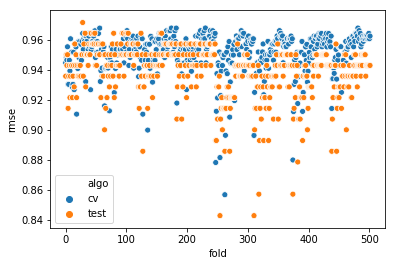

In [19]:
import seaborn as sns
cv_tupels = [[f,'cv',x] for f,x in zip(range(511),allresult4)]
test_tupels = [[f,'test',x] for f,x in zip(range(511),allresult5)]
results = pd.DataFrame(cv_tupels+test_tupels,columns=['fold','algo','rmse'])
sns.scatterplot(data=results,x='fold',y='rmse',hue='algo')

Answer:
1.Which subset looks best given the cross-validation scores?

    A:  The subset of 'thickness size shape adhesion nuclei chromatin nucleoli' is the best in train data with a score of 0.9677865117338801

2. What is the accuracy of this subset on the test data?
    A:  The accuracy of this subset on test data is 0.9571428571428572
    
3. Is that the best possible test data accuracy?
    A:  No, the best data accuracy for test data is not the best one in train data, is another setsub of 'thickness shape single' which has the accuracy of 0.9714285714285714

Part 3

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

sgd1 = SGDClassifier(random_state=1337316)
a = breastData.iloc[:,1:10]
b = breastData.iloc[:,10]
sgd_scores=cross_val_predict(sgd1,a,b,cv=10,method="decision_function")
print(sgd_scores)


fpr,tpr,thresholds = roc_curve(y, sgd_scores)
fpr,tpr,thresholds



[-120.95527326  565.20080309 -135.4515284   632.84999371  -84.71463543
 1490.54508915  120.64897897 -174.10820875 -162.02799614 -152.36382605
 -227.26114424 -239.34135686  272.85965788 -149.94778353 1149.88309349
  362.25323121 -186.18842136 -147.53174101  946.93552162  -94.37880552
  915.52696883  985.59220197 -212.76488911  383.99761391 -227.26114424
  449.23076201 -178.9402938  -159.61195362 -239.34135686 -251.42156947
 -212.76488911 -200.6846765   898.61467117 -169.27612371 -186.18842136
 -239.34135686 1219.94832664   94.07251123  893.78258613  562.78476056
  833.38152307  514.46391012 1103.97828557  311.51633824 1125.72266827
 -236.92531433  850.29382072 -265.9178246   -84.71463543  879.28633099
  461.31097462  304.26821067  748.82003478 1002.50449963  835.79756559
  688.41897173  701.67288556   81.49914039  344.53002842  276.96246085
  245.59180448 -227.26114424  706.49914039  -22.26533838 -265.9178246
  443.46825236 -147.53174101  368.66130255  984.0087929  -195.85259145
 -106.4

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

(array([0.        , 0.        , 0.        , 0.00218341, 0.00218341,
        0.00436681, 0.00436681, 0.00655022, 0.00655022, 0.00873362,
        0.00873362, 0.01091703, 0.01091703, 0.01310044, 0.01310044,
        0.01528384, 0.01528384, 0.01746725, 0.01746725, 0.01965066,
        0.01965066, 0.02183406, 0.02183406, 0.02401747, 0.02401747,
        0.02620087, 0.02620087, 0.03056769, 0.03056769, 0.03275109,
        0.03275109, 0.0371179 , 0.0371179 , 0.04803493, 0.04803493,
        0.05021834, 0.05021834, 0.05240175, 0.05240175, 0.05458515,
        0.05458515, 0.06550218, 0.069869  , 0.069869  , 0.08296943,
        0.08296943, 0.08951965, 0.09388646, 0.10043668, 0.10043668,
        0.12008734, 0.12445415, 0.1441048 , 0.14847162, 0.15720524,
        0.16375546, 0.17030568, 0.17467249, 0.18122271, 0.20524017,
        0.20524017, 0.21179039, 0.21615721, 0.22052402, 0.22707424,
        0.25327511, 0.25982533, 0.2860262 , 0.29475983, 0.29912664,
        0.30349345, 0.31877729, 0.3231441 , 0.36

In [21]:


forest_clf = RandomForestClassifier(random_state=1337316)
randomForest_scores=cross_val_predict(forest_clf,a,b,cv=10,method="predict_proba")
print(randomForest_scores)

y_scores_forest = randomForest_scores[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y, y_scores_forest)
fpr_forest, tpr_forest, thresholds_forest









/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

[[1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 ...
 [0.1 0.9]
 [0.2 0.8]
 [0.1 0.9]]


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(array([0.        , 0.00655022, 0.01310044, 0.01965066, 0.02401747,
        0.02620087, 0.02838428, 0.0371179 , 0.04803493, 0.07641921,
        0.10917031, 1.        ]),
 array([0.        , 0.57676349, 0.78423237, 0.87551867, 0.90871369,
        0.94190871, 0.95850622, 0.97510373, 0.98755187, 0.98755187,
        0.99585062, 1.        ]),
 array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

This is the auc for sgd:
0.9880229755929624
----------------
This is the auc for Random_Forest:
0.9884216057547699
----------------
This is the auc for GaussianNB:
0.985585895740093


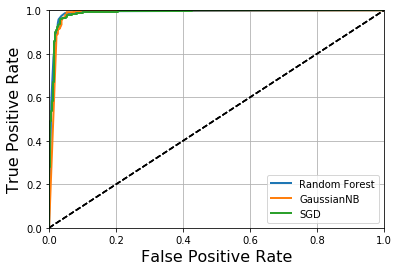

In [22]:
gnb = GaussianNB()
gnb_scores=cross_val_predict(gnb,a,b,cv=10,method="predict_proba")

y_scores_gnb = gnb_scores[:,1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y, y_scores_gnb)
fpr_gnb,tpr_gnb,thresholds_gnb

def plot_roc_curve(fpr_forest, tpr_forest, label=None):
    plt.plot(fpr_forest, tpr_forest, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16) 
    plt.grid(True)
    
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest" )
plot_roc_curve(fpr_gnb, tpr_gnb, "GaussianNB" )
plot_roc_curve(fpr,tpr,"SGD")
plt.legend(loc="lower right")



print("This is the auc for sgd:")
auc_sgd=roc_auc_score(y,sgd_scores)
print(auc_sgd)
print("----------------")
print("This is the auc for Random_Forest:")
auc_forest=roc_auc_score(y,y_scores_forest)
print(auc_forest)
print("----------------")
print("This is the auc for GaussianNB:")
auc_gnb=roc_auc_score(y,y_scores_gnb)
print(auc_gnb)


